In [2]:
import os, concurrent.futures

all_ip = []
os.popen('arp -d *','r')
ip3 = int(os.popen('ipconfig').read().split('无线局域网适配器 WLAN:')[1].split('默认网关')[1].split(': ')[1].split('.1\n')[0].split('192.168.')[1])
def scan(ip3:int,ip4:int):
    os.popen(f'ping -n 1 192.168.{ip3}.{ip4}')

with concurrent.futures.ThreadPoolExecutor(max_workers=255) as executor:
    futures = {executor.submit(scan, ip3,ip4): ip4 for ip4 in range(1,256)}

for line in (os.popen('arp -a').read().split('\n'))[4:-1]:
    if f'192.168.{ip3}.' in line:
        if '动态' in line:
            all_ip.append(f'192.168.{ip3}.'+line.split(f'192.168.{ip3}.')[1].split(' ')[0])

print(all_ip)

['192.168.11.220']


In [ ]:
'''
discription  : Copyright © 2021-2024 Blue Summer Studio. All rights reserved.
Author       : Niu zhixin
Date         : 2024-11-14 18:31:19
LastEditTime : 2024-11-14 18:48:35
LastEditors  : Niu zhixin
'''
import re

def check(text:str)  -> bool:
    ret = re.match(r'[a-zA-Z0-9_]{6,8}',text)
    if (not ret is None) and len(text) <= 8 and len(text) >=6:
        return True
    else:
        return False
    
print(check('jjfdjjjjj'))

C:\Users\nn\AppData\Local\Temp\ipykernel_18040\3132373310.py:8: UserWarning: PySoundFile failed. Trying audioread instead.
  waveform, sample_rate = librosa.load(audio_path, sr=None)
C:\Users\nn\AppData\Local\Temp\ipykernel_18040\3132373310.py:14: FutureWarning: get_duration() keyword argument 'filename' has been renamed to 'path' in version 0.10.0.
	This alias will be removed in version 1.0.
  duration = librosa.get_duration(filename=audio_path)
C:\Users\nn\AppData\Local\Temp\ipykernel_18040\3132373310.py:14: FutureWarning: PySoundFile failed. Trying audioread instead.
	Audioread support is deprecated in librosa 0.10.0 and will be removed in version 1.0.
  duration = librosa.get_duration(filename=audio_path)


Duration: 1249.1 seconds
Number of samples: 55087104


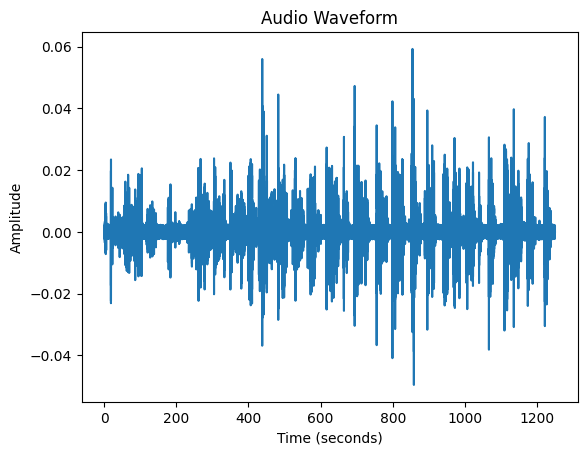

In [6]:
import librosa
from pydub import AudioSegment
import numpy as np
import matplotlib.pyplot as plt

# 使用librosa加载音频文件
audio_path = r"E:\LNSS\information\data\呼噜——使用Clipchamp制作 - 副本.mp3"
waveform, sample_rate = librosa.load(audio_path, sr=None)

# 使用pydub加载音频文件
audio = AudioSegment.from_mp3(audio_path)

# 获取音频时长
duration = librosa.get_duration(filename=audio_path)
print(f"Duration: {duration} seconds")

# 获取音频采样数
samples = len(waveform)
print(f"Number of samples: {samples}")

# 绘制波形图
plt.plot(np.arange(samples) / sample_rate, waveform)
plt.title("Audio Waveform")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()


In [1]:
from pydub import AudioSegment
from pydub.silence import split_on_silence
 
# 读取音频文件
audio = AudioSegment.from_file(r"天空之城 - V.A..mp3", format="mp3")
 
# 设置分割参数
min_silence_len = 300  # 最小静音长度
silence_thresh = -50  # 静音阈值，越小越严格
keep_silence = 200  # 保留静音长度
 
# 分割音频文件
segments = split_on_silence(audio, min_silence_len=min_silence_len, silence_thresh=silence_thresh,
                            keep_silence=keep_silence)
 
for idx in range(len(segments)):
    segments[idx].export(f'wav_{idx:04}.wav')

In [11]:
from pydub import AudioSegment

#	读入MP3音频文件
audio = AudioSegment.from_mp3('Python.mp3')

#	简单加一段空白(静音)片段
X = 2000	#ms
silent = AudioSegment.silent(duration=X)
new_audio = silent + audio

#	保存文件
new_audio.export("new_Python.mp3", format="mp3")


FileNotFoundError: [Errno 2] No such file or directory: 'Python.mp3'

In [ ]:
#匹配出0-100之间的数字
import re
ret = re.match(r"[1-9]?\d*|100","83434")
print(ret.group()) # 8